In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import geopandas as gpd
df_osm = gpd.read_file(r'../../data/raw/Shrewsbury/edges.shp')

In [4]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_density.csv') as Shrewsbury_parcel:
    df_Shrewsbury_parcel=pd.read_csv(Shrewsbury_parcel)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_27172\2818728463.py:2: DtypeWarning: Columns (24,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Shrewsbury_parcel=pd.read_csv(Shrewsbury_parcel)


In [5]:
df_Shrewsbury_parcel['FULL_STR'].sort_values().unique()

array(['ABBY LN', 'ACORN ST', 'ADAMS FARM RD', 'ADAMS RD', 'ADIN DR',
       'AFRA DR', 'ALDEN AVE', 'ALICE AVE', 'ALMONDWOOD CIR',
       'ALTHEA PATH', 'AMBERLY LN', 'AMHERST RD', 'ANGELA AVE',
       'ANGLIN LN', 'APPALOOSA DR', 'APPLE SEED DR', 'APPLEWOOD CIR',
       'ARBOR CIR', 'ARBOR DR', 'ARCH ST', 'ARCTURUS DR', 'ARGILA LN',
       'ARNOLD RD', 'ARROWWOOD DR', 'ARTEMAS AVE', 'ASHLEY DR',
       'ASHMONT ST', 'ASHTON DR', 'ASHWOOD CIR', 'ASPEN RD', 'ATWOOD LN',
       'AUDUBON DR', 'AVALON WAY', 'AVON AVE', 'AVON DR', 'BAGLEY AVE',
       'BAILEY RD', 'BAKER AVE', 'BALDWIN CIR', 'BALSAM CIR',
       'BANNISTER ST', 'BARNARD ST', 'BARROWS RD', 'BAY RD',
       'BAY VIEW DR', 'BAYBERRY CIR', 'BEACH ISLAND', 'BEACH RD',
       'BEACON ST', 'BEAVER DR', 'BECKET ST', 'BELLINGHAM WAY',
       'BELLRIDGE DR', 'BENJAMIN LN', 'BENTON ST', 'BERKSHIRE RD',
       'BETHS RD', 'BEVERLY HILL DR', 'BEVERLY RD', 'BIRCH BRUSH RD',
       'BIRCH LN', 'BIRCHWOOD DR', 'BITTERSWEET CIR', 'BLACKSTO

In [6]:
#df_parcel = pd.DataFrame(Index: [i in range(len(df_Shrewsbury_parcel['FULL_STR'].unique()))], columns=['FULL_STR', 'parcels', 'length'])
parcel=[]
for i in df_Shrewsbury_parcel['FULL_STR'].unique():
    df=df_Shrewsbury_parcel.loc[df_Shrewsbury_parcel.FULL_STR==i]
    parcel.append(len(df.index))
len(parcel)

707

In [7]:
FULL_STR=df_Shrewsbury_parcel['FULL_STR'].unique().tolist()
join = {'FULL_STR':FULL_STR,'parcels':parcel}
df_FULL_STR_parcels = pd.DataFrame(join)

In [8]:
df_osm['name'].sort_values().unique()

array(['Acorn Street', 'Adams Farm Road', 'Adams Road', 'Adin Drive',
       'Alden Avenue', 'Alice Avenue', 'Almondwood Circle', 'Althea Path',
       'Amberly Lane', 'Amherst Road', 'Angela Avenue', 'Anglin Lane',
       'Appaloosa Drive', 'Apple Seed Drive', 'Applewood Circle',
       'Arbor Circle', 'Arbor Drive', 'Arch Street', 'Arcturus Drive',
       'Argila Lane', 'Arnold Road', 'Arrowwood Drive', 'Artemas Avenue',
       'Ashley Drive', 'Ashmont Street', 'Ashton Drive', 'Ashwood Circle',
       'Aspen Road', 'Atwood Lane', 'Audubon Drive', 'Avalon Way',
       'Avon Avenue', 'Avon Drive', 'Bailey Road', 'Baker Avenue',
       'Baldwin Circle', 'Balsam Circle', 'Barnard Street',
       'Barrows Road', 'Bay View Drive', 'Bayberry Circle',
       'Beacon Street', 'Beaver Drive', 'Bellingham Way',
       'Bellridge Drive', 'Benjamin Lane', 'Benton Street',
       'Berkshire Road', 'Beths Road', 'Beverly Hill Drive',
       'Beverly Road', 'Birch Brush Road', 'Birch Lane',
       '

In [9]:
df_osm.to_csv(r'../../results/outcomes/Shrewsbury_street_length_osm.csv', index = False)

In [10]:
df_osm

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,width,length,from,to,access,bridge,geometry
0,69008159,71718041,0,455364322,0,2,US 20,Hartford Turnpike,primary,50 mph,18.3,183.974,71718041,69008159,None,None,"LINESTRING (-71.67313 42.27914, -71.67295 42.2..."
1,71375134,71532963,0,9414802,0,None,None,Harrington Farms Way,residential,None,None,60.788,71532963,71375134,None,None,"LINESTRING (-71.71240 42.27993, -71.71176 42.2..."
2,71375134,71587232,0,9415013,0,2,MA 140,Grafton Street,primary,35 mph,12.2,67.963,71587232,71375134,None,None,"LINESTRING (-71.71186 42.28065, -71.71184 42.2..."
3,71375134,71528522,0,9415013,0,2,MA 140,Grafton Street,primary,35 mph,12.2,77.214,71528522,71375134,None,None,"LINESTRING (-71.71128 42.27943, -71.71147 42.2..."
4,71375244,71663146,0,9414427,1,2,MA 9,Boston Turnpike,trunk,45 mph,30.2,106.263,71375244,71663146,None,None,"LINESTRING (-71.73834 42.27567, -71.73870 42.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6907824676,6907824676,0,737777927,0,1,None,None,residential,None,9.1,81.621,6907824676,6907824676,None,None,"LINESTRING (-71.73886 42.26837, -71.73884 42.2..."
1996,7911774073,7911774080,0,847854609,0,None,None,None,residential,None,None,12.821,7911774080,7911774073,None,None,"LINESTRING (-71.75289 42.27681, -71.75274 42.2..."
1997,7911774079,7911774080,0,"[847854609, 847854611]",0,None,None,Lakeside Path,residential,None,None,95.404,7911774080,7911774079,None,None,"LINESTRING (-71.75289 42.27681, -71.75311 42.2..."
1998,7911774080,7911774081,0,847854610,0,None,None,None,residential,None,None,9.655,7911774081,7911774080,None,None,"LINESTRING (-71.75286 42.27673, -71.75289 42.2..."


In [11]:
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('AVE', 'AVENUE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('BLVD','BOULEVARD')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('CIR','CIRCLE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('CT','COURT')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('CV','COVE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('DR','DRIVE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('LN','LANE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('PKWY','PARKWAY')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('PL','PLACE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('RD','ROAD')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('ST','STREET')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('TER','TERRACE')
df_FULL_STR_parcels['FULL_STR']=df_FULL_STR_parcels['FULL_STR'].str.replace('TPKE','TURNPIKE')

In [12]:
df_FULL_STR_parcels["length"] = ""

In [13]:
df_osm['name']

0          Hartford Turnpike
1       Harrington Farms Way
2             Grafton Street
3             Grafton Street
4            Boston Turnpike
                ...         
1995                    None
1996                    None
1997           Lakeside Path
1998                    None
1999                    None
Name: name, Length: 2000, dtype: object

In [14]:
df_osm['name']=df_osm['name'].str.upper()

In [15]:
df_osm['name']

0          HARTFORD TURNPIKE
1       HARRINGTON FARMS WAY
2             GRAFTON STREET
3             GRAFTON STREET
4            BOSTON TURNPIKE
                ...         
1995                    None
1996                    None
1997           LAKESIDE PATH
1998                    None
1999                    None
Name: name, Length: 2000, dtype: object

In [16]:
df_FULL_STR_parcels

,FULL_STR,parcels,length
0,VINNIE WAY,30,
1,S QUINSIGAMOND AVENUE,423,
2,FLAGG ROAD,23,
3,RAWSON HILL DRIVE,80,
4,EVERGREEN STREET,4,
...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,
703,DEAN DRIVE,1,
704,PAYTON PLACE,36,
705,ABBY LANE,36,


In [17]:
FULL_STR=df_FULL_STR_parcels['FULL_STR'].tolist()
FULL_STR

['VINNIE WAY',
 'S QUINSIGAMOND AVENUE',
 'FLAGG ROAD',
 'RAWSON HILL DRIVE',
 'EVERGREEN STREET',
 'SPRING STREET',
 'OLDE COLONY DRIVE',
 'ROUND TABLE ROAD',
 'DAVID ROAD',
 'KING ARTHUR ROAD',
 'BOYLSTREETON STREET',
 'PARTRIDGE HILL ROAD',
 'FOX HILL ROAD',
 'GULF STREET',
 'SEWALL DRIVE',
 'WACHUSETT CIRCLE',
 'LONGFELLOW ROAD',
 'BRYANT AVENUE',
 'BROOKLAWN PARKWAY',
 'IRA AVENUE',
 'CAMELOT DRIVE',
 'JAMIE LANE',
 'HIGH STREET',
 'PRATT LANE',
 'OAKLAND AVENUE',
 'SATURN DRIVE',
 'HOLMAN STREET',
 'OLD BROOK ROAD',
 'HILLANDO DRIVE',
 'SHEPAROAD LANE',
 'ODONNELL AVENUE',
 'SPRUCE STREET',
 'HARVAROAD AVENUE',
 'TURTLE CREEK CIRCLE',
 'FLAMINGO CIRCLE',
 'EASTREETWOOD ROAD',
 'BRIGHTSIDE AVENUE',
 'STREETATE STREET',
 'WASHINGTON STREET',
 'HUNTING AVENUE',
 'BENJAMIN LANE',
 'SOUTH STREET',
 'FLORAL STREET',
 'FLANAGAN DRIVE',
 'VIOLETTE CIRCLE',
 'AVON AVENUE',
 'OAK STREET',
 'OREGON AVENUE',
 'MELVIN AVENUE',
 'DEERFIELD ROAD',
 'KEMBLE DRIVE',
 'LIBERTY TREE LANE',
 'HEATH 

In [18]:
#df_length = pd.DataFrame({'FULL_STR' : [],'Length' : []})
#FULL_STR=df_Shrewsbury_parcel['FULL_STR'].unique()
street_name=[]
length=[]
for i in range(len(FULL_STR)):
    A=df_osm['length'].loc[df_osm.name==FULL_STR[i]].tolist()
    A=sum(A)
    if A==0:
        pass
    else:
        index=df[df['FULL_STR'] == True].index.tolist()
        df_FULL_STR_parcels['length'].loc[df_osm.name==FULL_STR[i]]=A

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_27172\1702571238.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FULL_STR_parcels['length'].loc[df_osm.name==FULL_STR[i]]=A
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_27172\1702571238.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FULL_STR_parcels['length'].loc[df_osm.name==FULL_STR[i]]=A
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_27172\1702571238.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [19]:
df_FULL_STR_parcels

,FULL_STR,parcels,length
0,VINNIE WAY,30,
1,S QUINSIGAMOND AVENUE,423,1478.804
2,FLAGG ROAD,23,5906.856
3,RAWSON HILL DRIVE,80,5906.856
4,EVERGREEN STREET,4,
...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,448.815
703,DEAN DRIVE,1,448.815
704,PAYTON PLACE,36,1345.954
705,ABBY LANE,36,1345.954


In [20]:
df_FULL_STR_parcels['length'].replace('', np.nan, inplace=True)

In [21]:
df_FULL_STR_parcels.dropna(subset=['length'], inplace=True)

In [22]:
df_FULL_STR_parcels

,FULL_STR,parcels,length
1,S QUINSIGAMOND AVENUE,423,1478.804
2,FLAGG ROAD,23,5906.856
3,RAWSON HILL DRIVE,80,5906.856
10,BOYLSTREETON STREET,172,1779.288
11,PARTRIDGE HILL ROAD,13,1779.288
...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,448.815
703,DEAN DRIVE,1,448.815
704,PAYTON PLACE,36,1345.954
705,ABBY LANE,36,1345.954


In [23]:
df_FULL_STR_parcels['density'] = df_FULL_STR_parcels['parcels']/df_FULL_STR_parcels['length']
df_FULL_STR_parcels['log_density'] = np.log10(df_FULL_STR_parcels['density'])

In [24]:
df_FULL_STR_parcels

,FULL_STR,parcels,length,density,log_density
1,S QUINSIGAMOND AVENUE,423,1478.804,0.286042,-0.543570
2,FLAGG ROAD,23,5906.856,0.003894,-2.409629
3,RAWSON HILL DRIVE,80,5906.856,0.013544,-1.868266
10,BOYLSTREETON STREET,172,1779.288,0.096668,-1.014718
11,PARTRIDGE HILL ROAD,13,1779.288,0.007306,-2.136303
...,...,...,...,...,...
702,SHREWSBURY GREEN DRIVE,752,448.815,1.675523,0.224150
703,DEAN DRIVE,1,448.815,0.002228,-2.652067
704,PAYTON PLACE,36,1345.954,0.026747,-1.572728
705,ABBY LANE,36,1345.954,0.026747,-1.572728


In [25]:
df_FULL_STR_parcels.to_csv(r'../../data/tidy/Shrewsbury_density.csv', index = False)

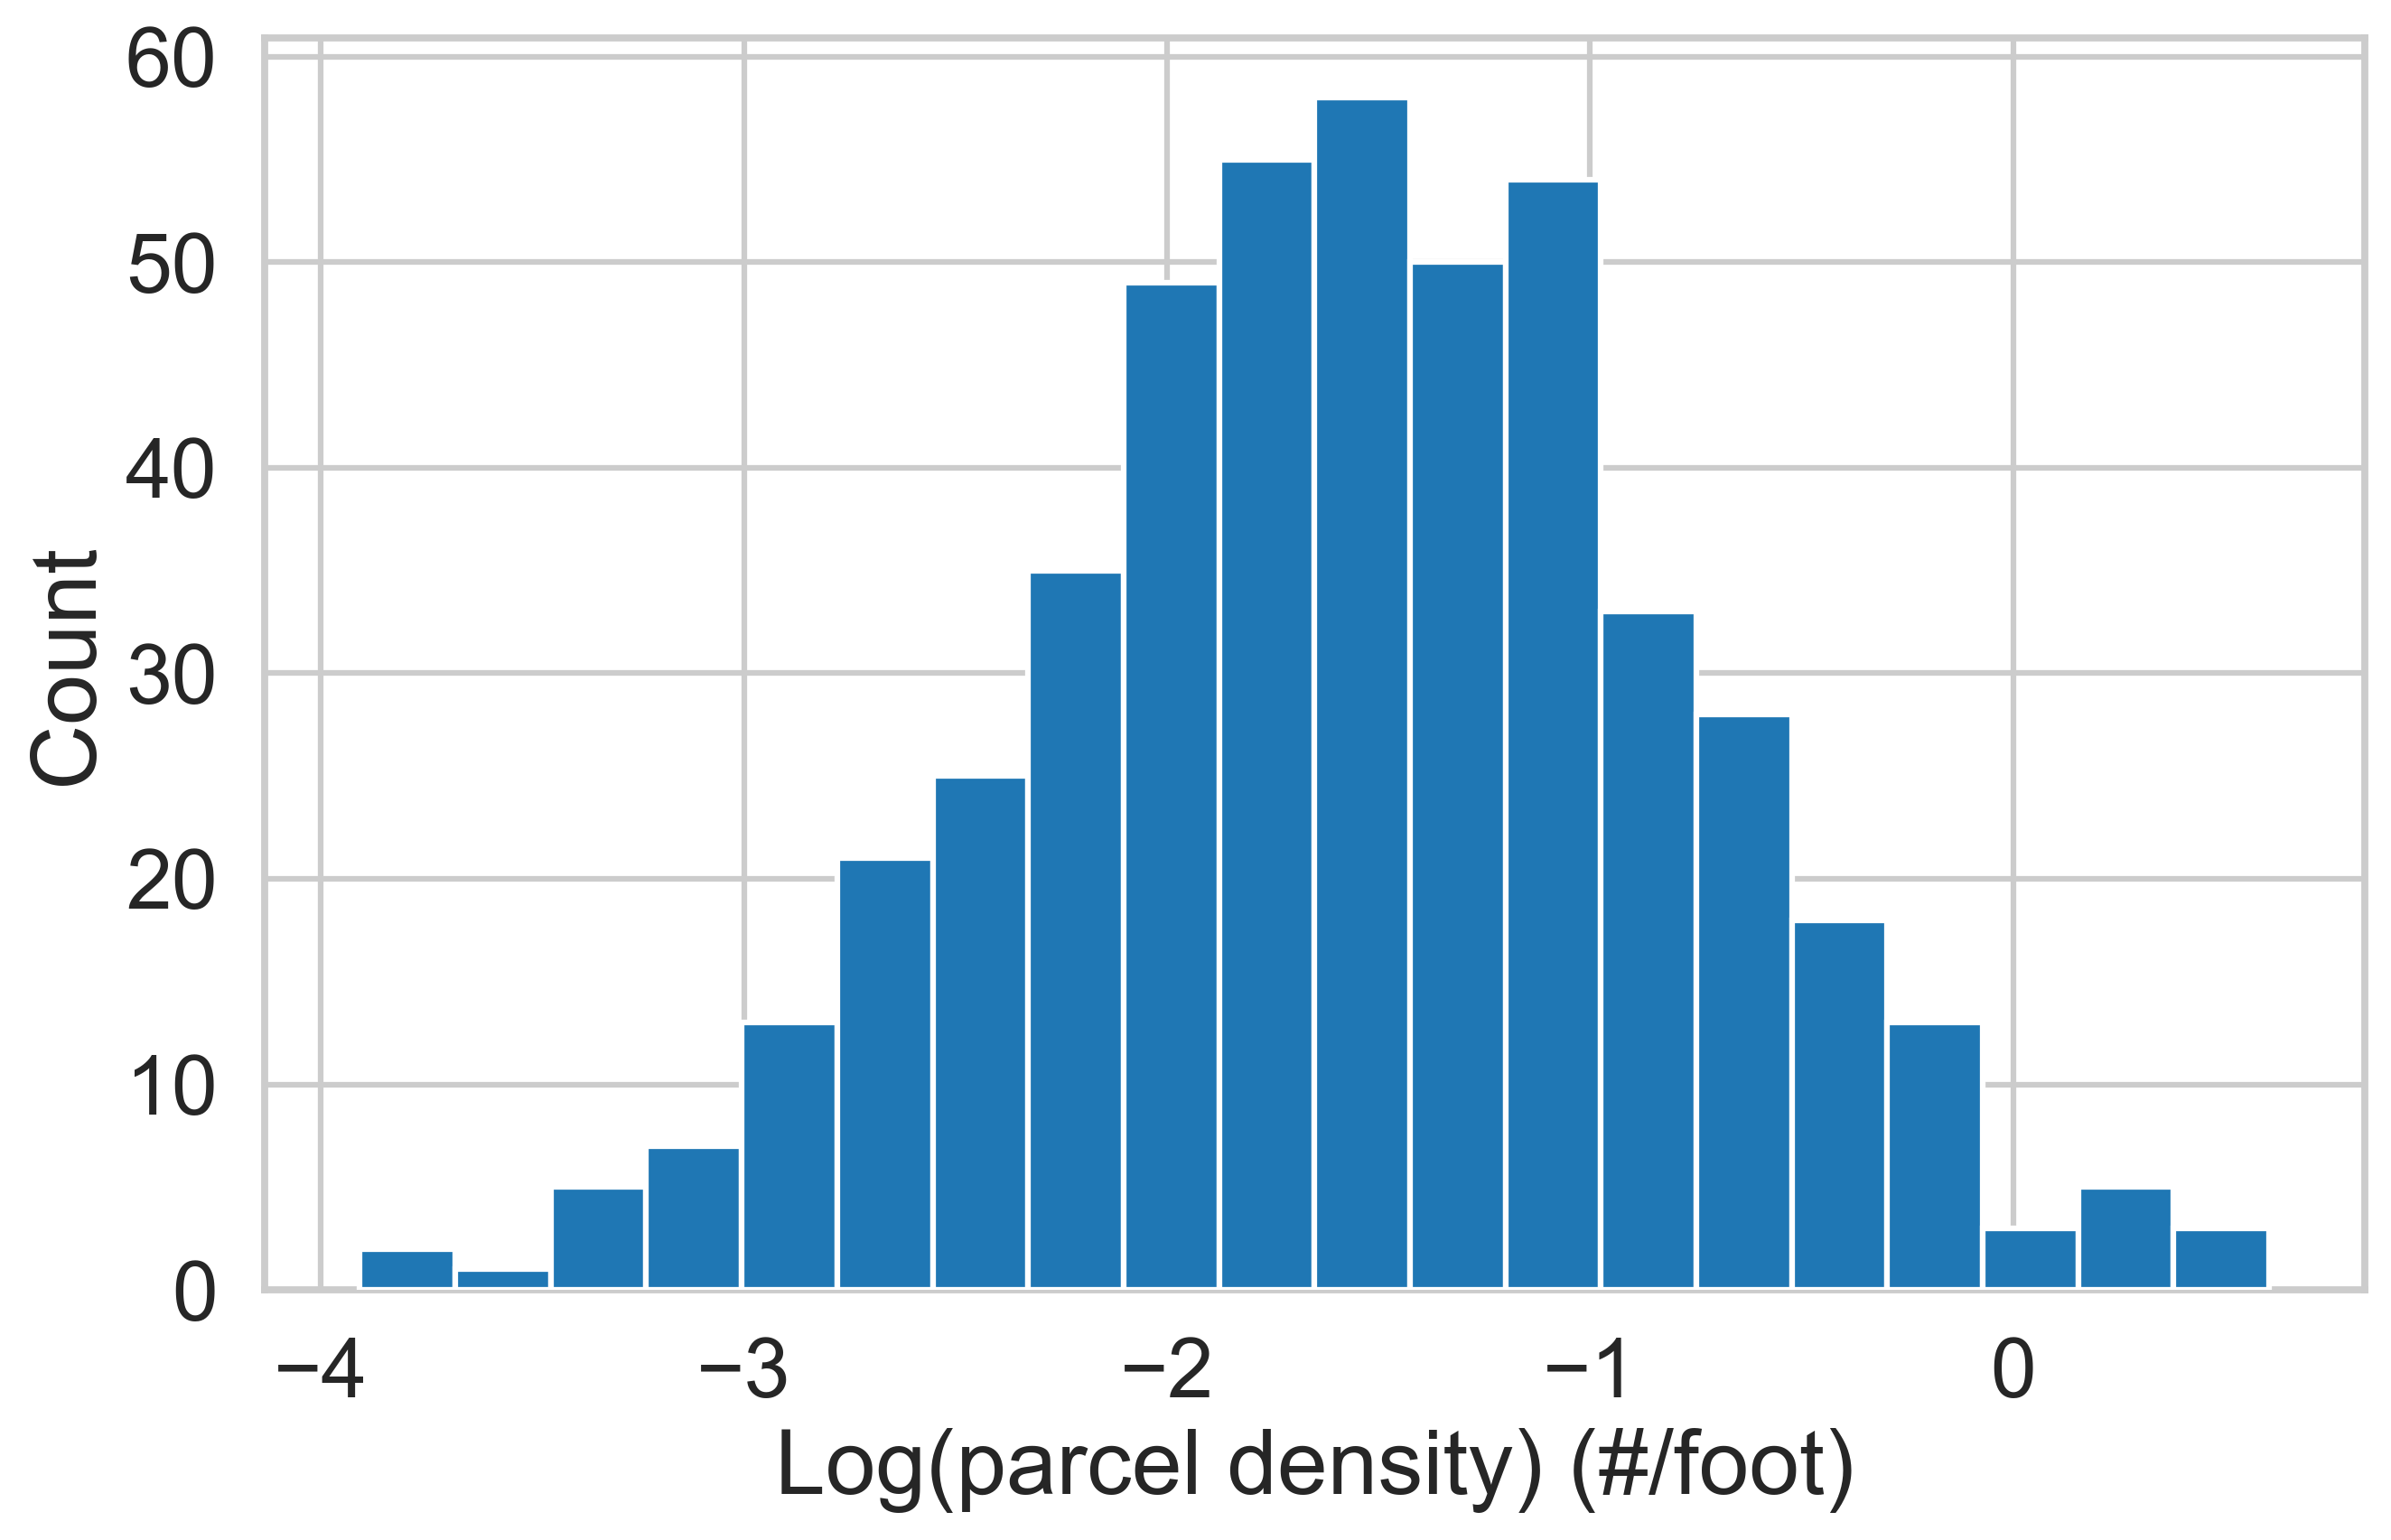

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.4)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
sns.histplot(data=df_FULL_STR_parcels['log_density'], bins=20, ax=ax, zorder=3, alpha=1)

# Set labels and title
ax.set_xlabel('Log(parcel density) (#/foot)', fontsize=24)
ax.set_ylabel('Count', fontsize=24)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=22)

# Bring grid lines to back
ax.grid(True, zorder=0)

# Save the plot
plt.savefig(r'../../figures/Shrewsbury_log_density.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


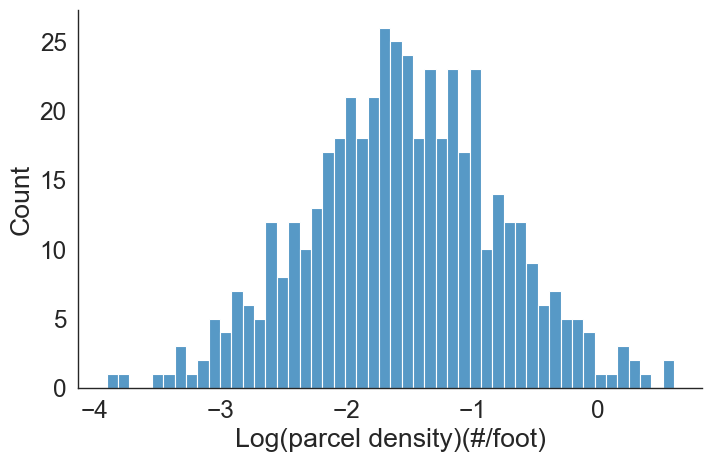

In [27]:
# plotting histogram for density of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
ax=sns.displot(data=df_FULL_STR_parcels['log_density'], kind="hist", bins = 50, aspect = 1.5)
ax.set(xlabel='Log(parcel density)(#/foot)', ylabel='Count')
plt.savefig(r'../../figures/Shrewsbury_log_density.png', dpi=300 ,bbox_inches='tight')

2024-06-11 21:11:28.508 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.976217)
2024-06-11 21:11:28.890 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.980179)
2024-06-11 21:11:28.981 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.974643)
2024-06-11 21:11:29.074 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.978445)
2024-06-11 21:11:29.249 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr distribution with error=1.490787)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.974643,429.681065,446.359508,inf,0.018345,0.996241
norm,0.976217,426.490743,434.829965,inf,0.021022,0.981279
lognorm,0.978445,429.593137,442.101970,inf,0.022223,0.968119
gamma,0.980179,429.478360,441.987192,inf,0.023972,0.940193
burr,1.490787,472.065599,488.744042,inf,0.080346,0.003935


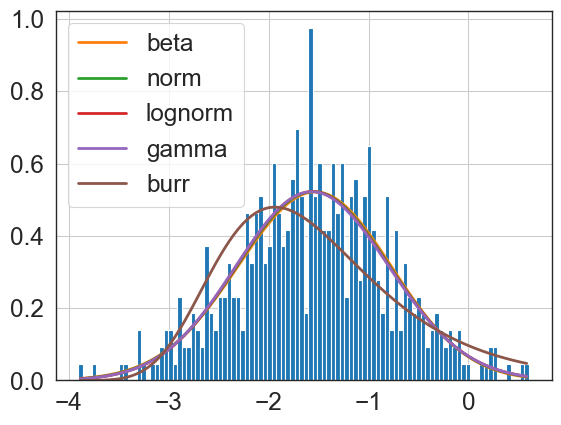

In [28]:
f = Fitter(df_FULL_STR_parcels['log_density'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,0.976217,426.490743,-2948.240136,inf


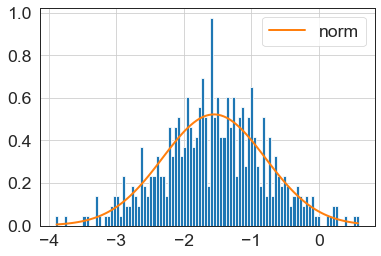

In [28]:
f = Fitter(df_FULL_STR_parcels['log_density'],
           distributions=["norm"])
f.fit()
f.summary()

In [29]:
f.fitted_param["norm"]

(-1.5524671002565889, 0.7638484639407965)

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
burr12,0.969916,427.061841,-2938.996430,inf
gennorm,0.970760,427.212869,-2944.749993,inf
powerlognorm,0.972075,429.282818,-2937.933502,inf
exponweib,0.972457,429.202659,-2937.745758,inf
genhyperbolic,0.973040,431.442374,-2931.289769,inf


C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


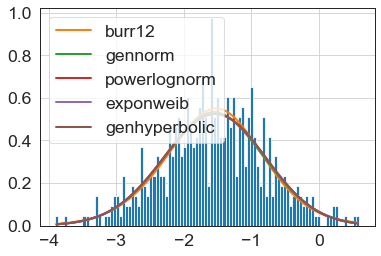

In [212]:
#f = Fitter(df_FULL_STR_parcels['log_density'])
#f.fit()
#f.summary()

In [27]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 271.2961348958089,
  'b': 164.71100500606877,
  'loc': -22.045772312762836,
  'scale': 32.93532788928974}}

In [28]:
f.fitted_param["beta"]

(271.2961348958089, 164.71100500606877, -22.045772312762836, 32.93532788928974)

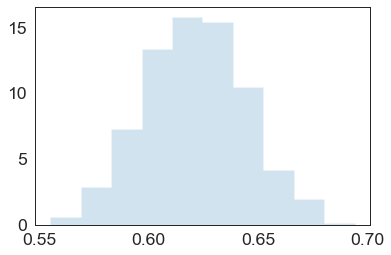

In [29]:
r= np.random.beta(271.2961348958089,164.71100500606877,625)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

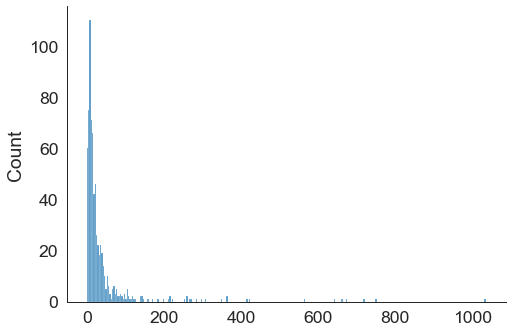

In [200]:
# plotting histogram for # of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=parcel, kind="hist", bins = 300, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
lognorm,0.000050,2179.421210,-11624.557253,inf
beta,0.000051,5813.361034,-11599.468446,inf
burr,0.000070,2034.128036,-11377.602055,inf
norm,0.001415,5076.932758,-9263.639488,inf
gamma,0.001913,28272.109485,-9044.017691,inf


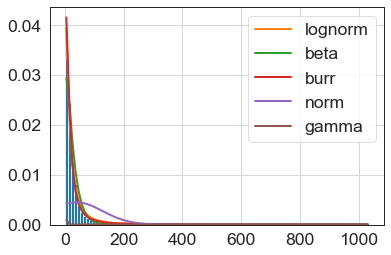

In [206]:
f = Fitter(parcel,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,0.000050,2179.421210,-11624.557253,inf
expon,0.000220,3405.695098,-10578.654803,inf
cauchy,0.000291,2161.405918,-10381.802608,inf
chi2,0.000579,1716.224683,-9889.459416,inf
exponpow,0.000757,1589.868545,-9699.534318,inf


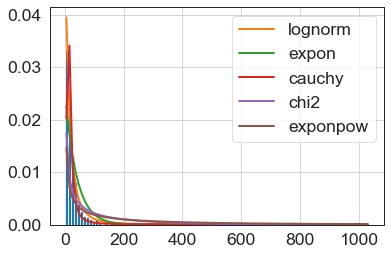

In [207]:
f = Fitter(parcel,
           distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
f.summary()

In [202]:
# We can see that the lognorm distribution is the best fit based on the sumsquare_error criteria.

In [208]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 1.1823428153991393,
  'loc': -0.1886494756247153,
  'scale': 16.81071768144596}}

In [204]:
f.fitted_param["lognorm"]

(1.1823428153991393, -0.1886494756247153, 16.81071768144596)

In [205]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [221]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df_FULL_STR_parcels['log_density'])
    a = stats.kstest(df_FULL_STR_parcels['log_density'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

burr12: statistic=0.014201848059628375, pvalue=0.9999612604497019
powerlognorm: statistic=0.016966467333070334, pvalue=0.9988102753454635
powernorm: statistic=0.017723125249662408, pvalue=0.9976852407728716
nct: statistic=0.017894415805232933, pvalue=0.9973406302770691
loggamma: statistic=0.018139391561853624, pvalue=0.9967793144913536
pearson3: statistic=0.01814734904428489, pvalue=0.9967596500548149
johnsonsb: statistic=0.018337374722301347, pvalue=0.9962617173462972
beta: statistic=0.018344966653743633, pvalue=0.9962406639060124
exponweib: statistic=0.018410440469153855, pvalue=0.9960552759094202
gengamma: statistic=0.01841209881680611, pvalue=0.996050490613219
gennorm: statistic=0.019500555925113072, pvalue=0.991819452279078
fisk: statistic=0.019554841900613296, pvalue=0.9915445123261734
tukeylambda: statistic=0.020468714391339626, pvalue=0.9858329564074445
johnsonsu: statistic=0.020987076232728274, pvalue=0.9815894719448254
norm: statistic=0.021021547120830986, pvalue=0.9812793015

  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 / 104: 

KeyboardInterrupt: 

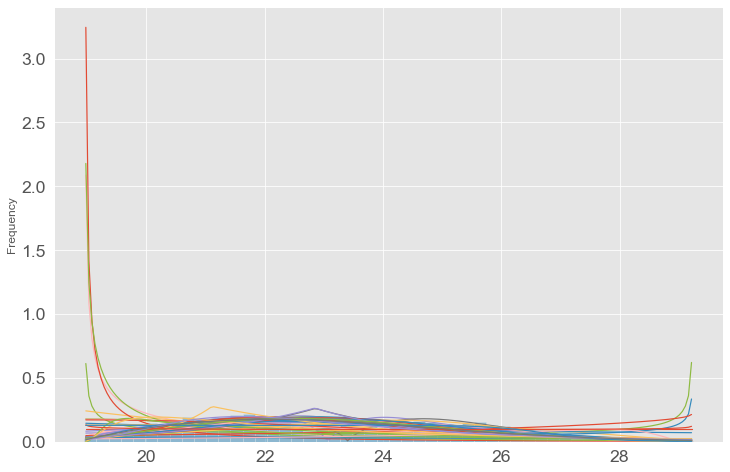

In [222]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

data=df_FULL_STR_parcels['log_density'] 

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [6]:
df_Shrewsbury_parcel.columns

Index(['fid', 'MAP_PAR_ID', 'LOC_ID', 'POLY_TYPE', 'MAP_NO', 'SOURCE',
       'PLAN_ID', 'LAST_EDIT', 'BND_CHK', 'NO_MATCH', 'TOWN_ID', 'PROP_ID',
       'BLDG_VAL', 'LAND_VAL', 'OTHER_VAL', 'TOTAL_VAL', 'FY', 'LOT_SIZE',
       'LS_DATE', 'LS_PRICE', 'USE_CODE', 'SITE_ADDR', 'ADDR_NUM', 'FULL_STR',
       'LOCATION', 'CITY', 'ZIP', 'OWNER1', 'OWN_ADDR', 'OWN_CITY',
       'OWN_STATE', 'OWN_ZIP', 'OWN_CO', 'LS_BOOK', 'LS_PAGE', 'REG_ID',
       'ZONING', 'YEAR_BUILT', 'BLD_AREA', 'UNITS', 'RES_AREA', 'STYLE',
       'NUM_ROOMS', 'LOT_UNITS', 'STORIES', 'SHAPE_AREA', 'SHAPE_LEN',
       'AREASYMBOL', 'SPATIALVER', 'MUSYM', 'MUKEY', 'SS_AREA', 'MUSYM_AREA',
       'SLOPE', 'AREANAME', 'MUNAME', 'COMPNAME', 'MUKIND', 'FRMLNDCLS',
       'HYDRCRATNG', 'DRAINCLASS', 'MINSURFTEX', 'TFACTOR', 'AWS100', 'AWS25',
       'DEP2WATTBL', 'DWELLWB', 'HYDROLGRP', 'NIRRLCC', 'ROADS', 'SEPTANKAF',
       'SLOPE_1', 'FLOODING', 'PONDING', 'CORCONCRET', 'TAXCLNAME',
       'CM2RESLYR', 'RESKIND', 'PARMAT

In [7]:
df_Shrewsbury_parcel['USE_CODE'].unique()

array(['1010', '1040', '1020', '1310', '9300', '310', '1300', '3910',
       '3260', '3900', '3160', '1320', '1090', '9700', '3410', '3240',
       '1050', '3140', '3250', '980V', '3320', '130', nan, '933V', '932V',
       '1060', '953V', '3230', '3400', '3050', '3420', '9000', '4000',
       '7170', '3440', '9311', '3180', '3300', '944V', '3370', '1110',
       '4020', '4400', '9310', '931I', '9602', '946V', '931V', '961V',
       '7130', '131', '9510', '970R', '914V', '934V', '9340', '971V',
       '3040', '3380', '3920', '3720', '962V', '3760', '1120', '7140',
       '410V', '9601', '4010', '919V', '106R', '4410', '3550', '4040',
       '3520', '9590', '4300', '920V', '9350', '974V', '906R', '3740',
       '3350', '950V', '915V', '3010', '936V', '910V', '931N', '3310',
       '3360', '9620', '3850', '4510', '9400', '9612', '031R', '3222',
       '9570', '961N', '1250', '3500', '3340', '935V', '9410', '9600',
       '327C', '4310', '6010', '340R', '3560', '103V', '925V', '9035',
    

In [10]:
# Count the number of each type
use_counts = df_Shrewsbury_parcel['USE_CODE'].value_counts()

# Display the counts
print(use_counts)

USE_CODE
1010    15015
1020     8000
9300      835
1040      469
1300      354
        ...  
3720        1
9612        1
906R        1
9620        1
3550        1
Name: count, Length: 125, dtype: int64


In [11]:
# Convert USE_CODE to string to simplify starts with operation
df_Shrewsbury_parcel['USE_CODE'] = df_Shrewsbury_parcel['USE_CODE'].astype(str)

# Filter by use type
residential = df_Shrewsbury_parcel[df_Shrewsbury_parcel['USE_CODE'].str.startswith('1')]
commercial = df_Shrewsbury_parcel[df_Shrewsbury_parcel['USE_CODE'].str.startswith('3')]
industrial = df_Shrewsbury_parcel[df_Shrewsbury_parcel['USE_CODE'].str.startswith('4')]

# Count each type
residential_count = residential.shape[0]
commercial_count = commercial.shape[0]
industrial_count = industrial.shape[0]

# Print the counts
print("Residential Count:", residential_count)
print("Commercial Count:", commercial_count)
print("Industrial Count:", industrial_count)


Residential Count: 24711
Commercial Count: 838
Industrial Count: 269
